# Brain Tumor Detection دانلود و پیش‌پردازش دیتاست



## دانلود دیتاست

In [ ]:
!pip install ultralytics -q
!pip install tqdm -q

import os
import zipfile
from IPython.display import display, Markdown

dataset_url = "https://github.com/ultralytics/assets/releases/download/v0.0.0/brain-tumor.zip"
dataset_dir = "/content/brain-tumor"

if not os.path.exists(dataset_dir):
    os.system(f"wget {dataset_url} -O brain-tumor.zip")
    with zipfile.ZipFile("brain-tumor.zip", 'r') as zip_ref:
        zip_ref.extractall("/content")
    display(Markdown("### دیتاست Brain Tumor با موفقیت دانلود و استخراج شد."))
else:
    display(Markdown("### دیتاست قبلا دانلود و استخراج شده است."))


### دیتاست Brain Tumor با موفقیت دانلود و استخراج شد.

## تابع پیش‌پردازش تصاویر

In [ ]:
import os
import zipfile
from IPython.display import display, Markdown
import cv2
import numpy as np
from tqdm import tqdm

!pip install ultralytics -q
!pip install tqdm -q

dataset_url = "https://github.com/ultralytics/assets/releases/download/v0.0.0/brain-tumor.zip"
dataset_dir = "/content/brain-tumor"
input_dir = "/content/train/images" # Define input_dir here
output_dir = "/content/brain-tumor-preprocessed/train/images" # Define output_dir here

if not os.path.exists(dataset_dir):
    os.system(f"wget {dataset_url} -O brain-tumor.zip")
    try:
        with zipfile.ZipFile("brain-tumor.zip", 'r') as zip_ref:
            zip_ref.extractall("/content")
        display(Markdown("### دیتاست Brain Tumor با موفقیت دانلود و استخراج شد."))
    except zipfile.BadZipFile:
        display(Markdown("### خطا در استخراج فایل زیپ. فایل ممکن است خراب باشد."))
    except Exception as e:
        display(Markdown(f"### خطای ناشناخته در استخراج فایل زیپ: {e}"))
else:
    display(Markdown("### دیتاست قبلا دانلود و استخراج شده است."))

def preprocess_mri_image(img_path, output_path, img_size=640):
    img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
    if img is None:
        return False
    img_norm = cv2.normalize(img, None, 0, 255, cv2.NORM_MINMAX)
    img_denoised = cv2.GaussianBlur(img_norm, (5,5), 0)
    clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))
    img_clahe = clahe.apply(img_denoised)
    h, w = img_clahe.shape
    scale = img_size / max(h, w)
    new_w, new_h = int(w*scale), int(h*scale)
    img_resized = cv2.resize(img_clahe, (new_w, new_h))
    top = (img_size - new_h) // 2
    bottom = img_size - new_h - top
    left = (img_size - new_w) // 2
    right = img_size - new_w - left
    img_padded = cv2.copyMakeBorder(img_resized, top, bottom, left, right, cv2.BORDER_CONSTANT, value=0)
    cv2.imwrite(output_path, img_padded)
    return True

### دیتاست Brain Tumor با موفقیت دانلود و استخراج شد.

## train و valid اجرای پیش‌پردازش روی تصاویر  

In [ ]:
os.makedirs(output_dir, exist_ok=True)

if not os.path.exists(input_dir):
    display(Markdown(f"### خطا: مسیر ورودی برای تصاویر آموزش پیدا نشد: {input_dir}"))
else:
    image_files = [f for f in os.listdir(input_dir) if f.lower().endswith(('.png','.jpg','.jpeg'))]

    count_processed = 0
    for img_file in tqdm(image_files):
        out_path = os.path.join(output_dir, img_file)
        if not os.path.exists(out_path):
            in_path = os.path.join(input_dir, img_file)
            if preprocess_mri_image(in_path, out_path):
                count_processed += 1
    print(f"تعداد تصاویر پیش‌پردازش شده جدید در train: {count_processed}")

    input_val_dir = "/content/valid/images"
    output_val_dir = "/content/brain-tumor-preprocessed/valid/images"
    os.makedirs(output_val_dir, exist_ok=True)

    if not os.path.exists(input_val_dir):
         display(Markdown(f"### خطا: مسیر ورودی برای تصاویر اعتبارسنجی پیدا نشد: {input_val_dir}"))
    else:
        val_image_files = [f for f in os.listdir(input_val_dir) if f.lower().endswith(('.png','.jpg','.jpeg'))]

        count_val_processed = 0
        for img_file in tqdm(val_image_files):
            out_path = os.path.join(output_val_dir, img_file)
            if not os.path.exists(out_path):
                in_path = os.path.join(input_val_dir, img_file)
                if preprocess_mri_image(in_path, out_path):
                    count_val_processed += 1
        print(f"تعداد تصاویر پیش‌پردازش شده جدید در valid: {count_val_processed}")


100%|██████████| 893/893 [00:00<00:00, 190553.19it/s]


تعداد تصاویر پیش‌پردازش شده جدید در train: 0


100%|██████████| 223/223 [00:00<00:00, 147925.00it/s]

تعداد تصاویر پیش‌پردازش شده جدید در valid: 0


## به‌روزرسانی فایل برای مسیرهای تصاویر پیش‌پردازش شده

In [ ]:
import yaml

yaml_original_path = "/content/data.yaml"
yaml_new_path = "/content/brain-tumor-preprocessed/brain-tumor.yaml"

with open(yaml_original_path, "r") as f:
    data_cfg = yaml.safe_load(f)

data_cfg["train"] = "/content/brain-tumor-preprocessed/train/images"
data_cfg["val"] = "/content/brain-tumor-preprocessed/valid/images"

with open(yaml_new_path, "w") as f:
    yaml.dump(data_cfg, f)

print("فایل YAML با مسیرهای جدید به‌روز شد.")


فایل YAML با مسیرهای جدید به‌روز شد.


# تحلیل داده‌ها با نمودارهای توزیع و نمونه‌ها




##نمایش تعدادی از تصاویر



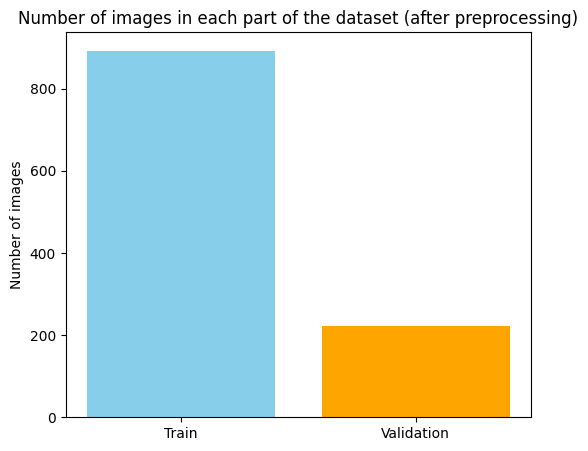

In [ ]:
import matplotlib.pyplot as plt

train_imgs = os.listdir(output_dir)
valid_imgs = os.listdir(output_val_dir)

plt.figure(figsize=(6,5))
plt.bar(['Train', 'Validation'], [len(train_imgs), len(valid_imgs)], color=['skyblue', 'orange'])
plt.title('Number of images in each part of the dataset (after preprocessing)')
plt.ylabel('Number of images')
plt.show()


## نمایش نمونه‌های تصادفی قبل و بعد پیش‌پردازش


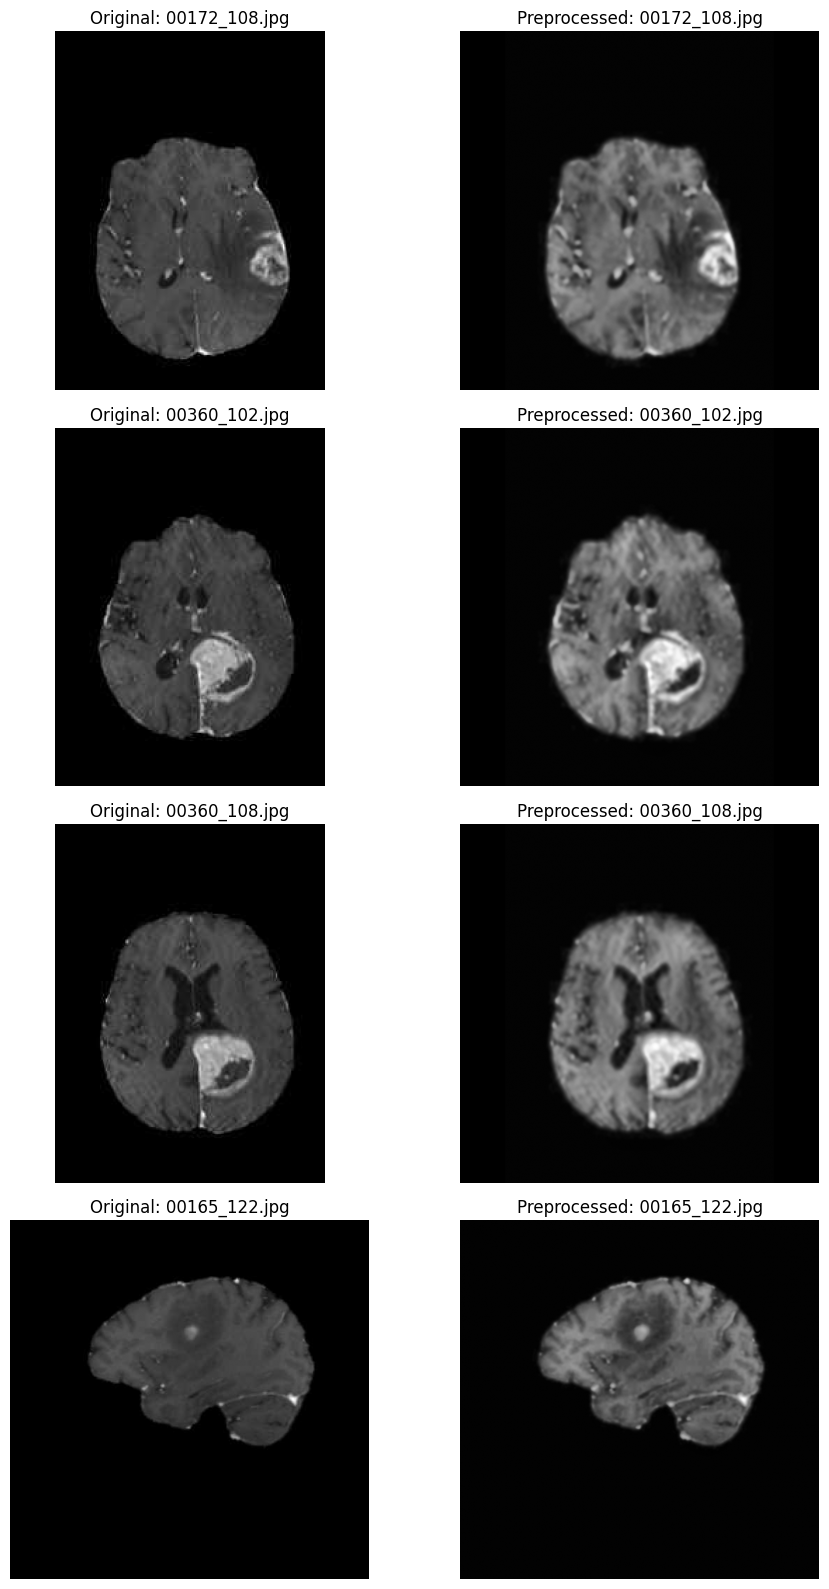

In [ ]:
import random
import cv2

sample_imgs = random.sample(image_files, 4)

fig, axs = plt.subplots(4, 2, figsize=(10, 16))
for i, img_name in enumerate(sample_imgs):
    orig_path = os.path.join(input_dir, img_name)
    preproc_path = os.path.join(output_dir, img_name)
    orig_img = cv2.imread(orig_path, cv2.IMREAD_GRAYSCALE)
    preproc_img = cv2.imread(preproc_path, cv2.IMREAD_GRAYSCALE)
    axs[i,0].imshow(orig_img, cmap='gray')
    axs[i,0].set_title(f"Original: {img_name}")
    axs[i,0].axis('off')
    axs[i,1].imshow(preproc_img, cmap='gray')
    axs[i,1].set_title(f"Preprocessed: {img_name}")
    axs[i,1].axis('off')
plt.tight_layout()
plt.show()


# YOLOv8 آموزش مدل  

## توزیع نمونه‌ها بر اساس کلاس (وجود تومور یا عدم وجود)



In [ ]:
import zipfile

zip_path = "/content/brain-tumor.zip"
extract_to = "/content/brain-tumor"

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_to)

print(f"فایل {zip_path} به پوشه {extract_to} استخراج شد.")

فایل /content/brain-tumor.zip به پوشه /content/brain-tumor استخراج شد.


In [ ]:
import os
import shutil
from IPython.display import display, Markdown

original_train_labels_dir = "/content/brain-tumor/train/labels"
preprocessed_train_labels_dir = "/content/brain-tumor-preprocessed/train/labels"
original_val_labels_dir = "/content/brain-tumor/valid/labels"
preprocessed_val_labels_dir = "/content/brain-tumor-preprocessed/valid/labels"

os.makedirs(preprocessed_train_labels_dir, exist_ok=True)
os.makedirs(preprocessed_val_labels_dir, exist_ok=True)

if os.path.exists(original_train_labels_dir):
    for label_file in os.listdir(original_train_labels_dir):
        src_path = os.path.join(original_train_labels_dir, label_file)
        dst_path = os.path.join(preprocessed_train_labels_dir, label_file)
        shutil.copy2(src_path, dst_path)
    display(Markdown(f"### فایل‌های برچسب آموزش با موفقیت به مسیر جدید کپی شدند: {preprocessed_train_labels_dir}"))
else:
     display(Markdown(f"### خطا: مسیر اصلی برای فایل‌های برچسب آموزش پیدا نشد: {original_train_labels_dir}"))

if os.path.exists(original_val_labels_dir):
    for label_file in os.listdir(original_val_labels_dir):
        src_path = os.path.join(original_val_labels_dir, label_file)
        dst_path = os.path.join(preprocessed_val_labels_dir, label_file)
        shutil.copy2(src_path, dst_path)
    display(Markdown(f"### فایل‌های برچسب اعتبارسنجی با موفقیت به مسیر جدید کپی شدند: {preprocessed_val_labels_dir}"))
else:
     display(Markdown(f"### خطا: مسیر اصلی برای فایل‌های برچسب اعتبارسنجی پیدا نشد: {original_val_labels_dir}"))

### فایل‌های برچسب آموزش با موفقیت به مسیر جدید کپی شدند: /content/brain-tumor-preprocessed/train/labels

### فایل‌های برچسب اعتبارسنجی با موفقیت به مسیر جدید کپی شدند: /content/brain-tumor-preprocessed/valid/labels

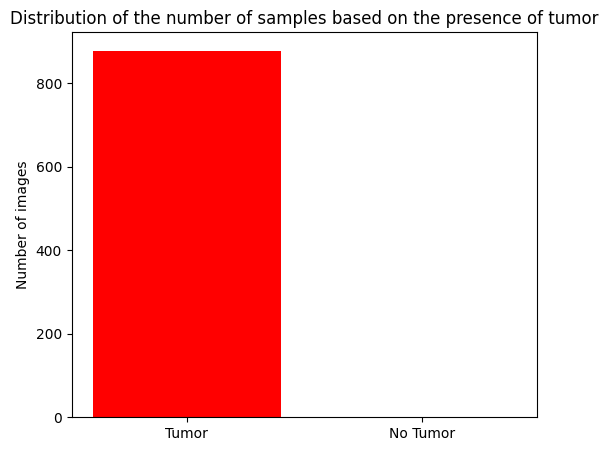

In [ ]:
labels_dir = "/content/brain-tumor-preprocessed/train/labels"
label_files = os.listdir(labels_dir)

tumor_count = 0
no_tumor_count = 0

for file in label_files:
    with open(os.path.join(labels_dir, file), "r") as f:
        lines = f.readlines()
        if len(lines) == 0:
            no_tumor_count += 1
        else:
            tumor_count += 1

plt.figure(figsize=(6,5))
plt.bar(['Tumor', 'No Tumor'], [tumor_count, no_tumor_count], color=['red', 'green'])
plt.title("Distribution of the number of samples based on the presence of tumor")
plt.ylabel("Number of images")
plt.show()


In [ ]:
import os

train_labels_dir = "/content/brain-tumor-preprocessed/train/labels"
valid_labels_dir = "/content/brain-tumor-preprocessed/valid/labels"

print(f"تعداد فایل‌های برچسب در train: {len(os.listdir(train_labels_dir))}")
print(f"تعداد فایل‌های برچسب در valid: {len(os.listdir(valid_labels_dir))}")

sample_files = os.listdir(train_labels_dir)[:3]
for f in sample_files:
    with open(os.path.join(train_labels_dir, f), 'r') as file:
        content = file.read()
    print(f"محتوای {f}:")
    print(content)
    print("------------")


تعداد فایل‌های برچسب در train: 878
تعداد فایل‌های برچسب در valid: 223
محتوای 00322_153.txt:
1 0.604069 0.535211 0.126761 0.133803
------------
محتوای 00360_90.txt:
1 0.622066 0.704225 0.187793 0.129108
------------
محتوای 66 (13).txt:
1 0.704812 0.463028 0.090376 0.090376
------------


## آموزش

In [ ]:
from ultralytics import YOLO
from IPython.display import display, Markdown

model = YOLO("yolov8n.pt")
display(Markdown("### مدل YOLOv8n پیش‌آموزش‌دیده بارگذاری شد."))

results = model.train(
    data=yaml_new_path,
    epochs=30,
    batch=16,
    imgsz=640,
    project="brain_tumor_finetune",
    name="yolov8_brain_tumor_preprocessed",
    exist_ok=True
)

display(Markdown("### آموزش مدل با داده‌های پیش‌پردازش شده کامل شد."))


### مدل YOLOv8n پیش‌آموزش‌دیده بارگذاری شد.

Ultralytics 8.3.141 🚀 Python-3.11.12 torch-2.6.0+cu124 CPU (Intel Xeon 2.20GHz)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/brain-tumor-preprocessed/brain-tumor.yaml, degrees=0.0, deterministic=True, device=cpu, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=30, erasing=0.4, exist_ok=True, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov8n.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=yolov8_brain_tumor_preprocessed, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=100, perspec

train: Scanning /content/brain-tumor-preprocessed/train/labels... 878 images, 15 backgrounds, 0 corrupt: 100%|██████████| 893/893 [00:00<00:00, 1389.35it/s]

train: New cache created: /content/brain-tumor-preprocessed/train/labels.cache


albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 466.2±246.9 MB/s, size: 22.8 KB)


val: Scanning /content/brain-tumor-preprocessed/valid/labels... 223 images, 0 backgrounds, 0 corrupt: 100%|██████████| 223/223 [00:00<00:00, 1389.01it/s]

val: New cache created: /content/brain-tumor-preprocessed/valid/labels.cache


Plotting labels to brain_tumor_finetune/yolov8_brain_tumor_preprocessed/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001667, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 0 dataloader workers
Logging results to brain_tumor_finetune/yolov8_brain_tumor_preprocessed
Starting training for 30 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/30         0G      1.659      3.643      1.408         16        640: 100%|██████████| 56/56 [03:17<00:00,  3.53s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:21<00:00,  3.05s/it]

                   all        223        241    0.00153      0.438     0.0466     0.0164



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/30         0G      1.481      2.633       1.31         25        640: 100%|██████████| 56/56 [03:15<00:00,  3.49s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:18<00:00,  2.58s/it]

                   all        223        241      0.308      0.304      0.206      0.117



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/30         0G      1.488      2.345      1.324         24        640: 100%|██████████| 56/56 [03:14<00:00,  3.48s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:18<00:00,  2.58s/it]

                   all        223        241      0.371      0.508      0.367       0.24



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/30         0G      1.433      2.045      1.297         24        640: 100%|██████████| 56/56 [03:14<00:00,  3.48s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:18<00:00,  2.60s/it]

                   all        223        241       0.35      0.532      0.332      0.197



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/30         0G      1.432      1.897      1.306         26        640: 100%|██████████| 56/56 [03:14<00:00,  3.48s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:17<00:00,  2.50s/it]

                   all        223        241      0.399      0.611      0.382      0.225



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/30         0G      1.358      1.738      1.255         15        640: 100%|██████████| 56/56 [03:14<00:00,  3.47s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:16<00:00,  2.41s/it]

                   all        223        241      0.368      0.673       0.41      0.272



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/30         0G       1.36      1.659      1.254         21        640: 100%|██████████| 56/56 [03:15<00:00,  3.49s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:17<00:00,  2.55s/it]

                   all        223        241      0.465      0.681      0.465      0.322



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/30         0G      1.386      1.603      1.264         26        640: 100%|██████████| 56/56 [03:15<00:00,  3.49s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:18<00:00,  2.62s/it]

                   all        223        241       0.47      0.764      0.484      0.329



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/30         0G      1.314      1.526      1.225         23        640: 100%|██████████| 56/56 [03:15<00:00,  3.50s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:17<00:00,  2.43s/it]

                   all        223        241      0.417      0.671      0.414      0.277



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/30         0G      1.297      1.488        1.2         19        640: 100%|██████████| 56/56 [03:15<00:00,  3.48s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:17<00:00,  2.50s/it]

                   all        223        241      0.436       0.73      0.472      0.332



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/30         0G      1.278      1.436      1.203         20        640: 100%|██████████| 56/56 [03:15<00:00,  3.49s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:16<00:00,  2.42s/it]

                   all        223        241      0.397      0.409      0.319      0.182



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/30         0G      1.277        1.4      1.189         31        640: 100%|██████████| 56/56 [03:15<00:00,  3.48s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:18<00:00,  2.60s/it]

                   all        223        241      0.429      0.811      0.473      0.322



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/30         0G      1.259       1.39      1.195         17        640: 100%|██████████| 56/56 [03:14<00:00,  3.47s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:18<00:00,  2.58s/it]

                   all        223        241       0.46       0.81      0.498      0.355



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/30         0G      1.226      1.374      1.168         23        640: 100%|██████████| 56/56 [03:15<00:00,  3.48s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:17<00:00,  2.47s/it]

                   all        223        241      0.457      0.758      0.503      0.355



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/30         0G       1.22      1.377      1.175         25        640: 100%|██████████| 56/56 [03:14<00:00,  3.47s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:17<00:00,  2.55s/it]

                   all        223        241       0.47       0.82      0.497      0.348



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/30         0G      1.183      1.346      1.157         20        640: 100%|██████████| 56/56 [03:15<00:00,  3.49s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:17<00:00,  2.53s/it]

                   all        223        241      0.468      0.831      0.519      0.356



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/30         0G      1.164      1.298      1.144         18        640: 100%|██████████| 56/56 [03:16<00:00,  3.50s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:17<00:00,  2.55s/it]

                   all        223        241      0.455      0.811      0.495      0.362



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/30         0G      1.164      1.298       1.16         21        640: 100%|██████████| 56/56 [03:15<00:00,  3.50s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:19<00:00,  2.73s/it]

                   all        223        241      0.442      0.785      0.482      0.336



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/30         0G      1.147      1.271      1.145         15        640: 100%|██████████| 56/56 [03:15<00:00,  3.49s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:18<00:00,  2.60s/it]

                   all        223        241      0.463      0.839      0.498      0.351



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/30         0G      1.133      1.252      1.134         26        640: 100%|██████████| 56/56 [03:15<00:00,  3.49s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:18<00:00,  2.61s/it]

                   all        223        241      0.443      0.869      0.491      0.345


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/30         0G      1.078      1.193      1.129         12        640: 100%|██████████| 56/56 [03:15<00:00,  3.49s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:18<00:00,  2.57s/it]

                   all        223        241      0.464      0.778      0.515      0.365



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/30         0G      1.044      1.161      1.108         12        640: 100%|██████████| 56/56 [03:13<00:00,  3.46s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:17<00:00,  2.51s/it]

                   all        223        241      0.462      0.838      0.473      0.345



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/30         0G      1.016      1.131      1.085         14        640: 100%|██████████| 56/56 [03:14<00:00,  3.47s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:18<00:00,  2.60s/it]

                   all        223        241      0.458      0.812      0.508       0.37



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/30         0G     0.9863      1.106      1.081         14        640: 100%|██████████| 56/56 [03:13<00:00,  3.45s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:18<00:00,  2.66s/it]

                   all        223        241      0.432      0.775      0.468      0.337



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/30         0G     0.9614      1.066      1.062         13        640: 100%|██████████| 56/56 [03:13<00:00,  3.46s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:17<00:00,  2.51s/it]

                   all        223        241       0.42      0.835      0.451      0.314



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/30         0G     0.9609       1.07      1.065         15        640: 100%|██████████| 56/56 [03:14<00:00,  3.47s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:18<00:00,  2.65s/it]

                   all        223        241      0.442      0.818      0.476      0.344



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/30         0G     0.9544      1.046      1.051         13        640: 100%|██████████| 56/56 [03:15<00:00,  3.49s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:18<00:00,  2.61s/it]

                   all        223        241      0.438      0.849      0.472      0.341



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/30         0G     0.9183      1.017      1.024         13        640: 100%|██████████| 56/56 [03:14<00:00,  3.47s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:17<00:00,  2.53s/it]

                   all        223        241      0.428      0.887      0.452      0.323



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/30         0G      0.897      1.007      1.019         13        640: 100%|██████████| 56/56 [03:14<00:00,  3.48s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:18<00:00,  2.59s/it]

                   all        223        241      0.436      0.853      0.463      0.341



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/30         0G     0.8704     0.9738      1.009         15        640: 100%|██████████| 56/56 [03:13<00:00,  3.46s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:18<00:00,  2.63s/it]

                   all        223        241      0.436      0.856      0.453      0.329



30 epochs completed in 1.778 hours.
Optimizer stripped from brain_tumor_finetune/yolov8_brain_tumor_preprocessed/weights/last.pt, 6.2MB
Optimizer stripped from brain_tumor_finetune/yolov8_brain_tumor_preprocessed/weights/best.pt, 6.2MB

Validating brain_tumor_finetune/yolov8_brain_tumor_preprocessed/weights/best.pt...
Ultralytics 8.3.141 🚀 Python-3.11.12 torch-2.6.0+cu124 CPU (Intel Xeon 2.20GHz)
Model summary (fused): 72 layers, 3,006,038 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:16<00:00,  2.41s/it]


                   all        223        241      0.458      0.813      0.508       0.37
              negative        142        154      0.582      0.822      0.631      0.461
              positive         81         87      0.335      0.805      0.384      0.278
Speed: 1.2ms preprocess, 68.1ms inference, 0.0ms loss, 0.5ms postprocess per image
Results saved to brain_tumor_finetune/yolov8_brain_tumor_preprocessed


### آموزش مدل با داده‌های پیش‌پردازش شده کامل شد.

## رسم نمودارهای آموزش

نمایش چند سطر اول فایل results.csv:


,epoch,time,train/box_loss,train/cls_loss,train/dfl_loss,metrics/precision(B),metrics/recall(B),metrics/mAP50(B),metrics/mAP50-95(B),val/box_loss,val/cls_loss,val/dfl_loss,lr/pg0,lr/pg1,lr/pg2
0,1,225.229,0.0,104.6700,0.0,0.0,0.0,0.0,0.0,0.0,197.1940,0.0,0.000546,0.000546,0.000546
1,2,441.104,0.0,76.7055,0.0,0.0,0.0,0.0,0.0,0.0,144.4530,0.0,0.001065,0.001065,0.001065
2,3,652.248,0.0,56.2882,0.0,0.0,0.0,0.0,0.0,0.0,95.9759,0.0,0.001548,0.001548,0.001548
3,4,862.965,0.0,37.9605,0.0,0.0,0.0,0.0,0.0,0.0,101.7250,0.0,0.001502,0.001502,0.001502
4,5,1074.220,0.0,24.0477,0.0,0.0,0.0,0.0,0.0,0.0,39.1888,0.0,0.001447,0.001447,0.001447


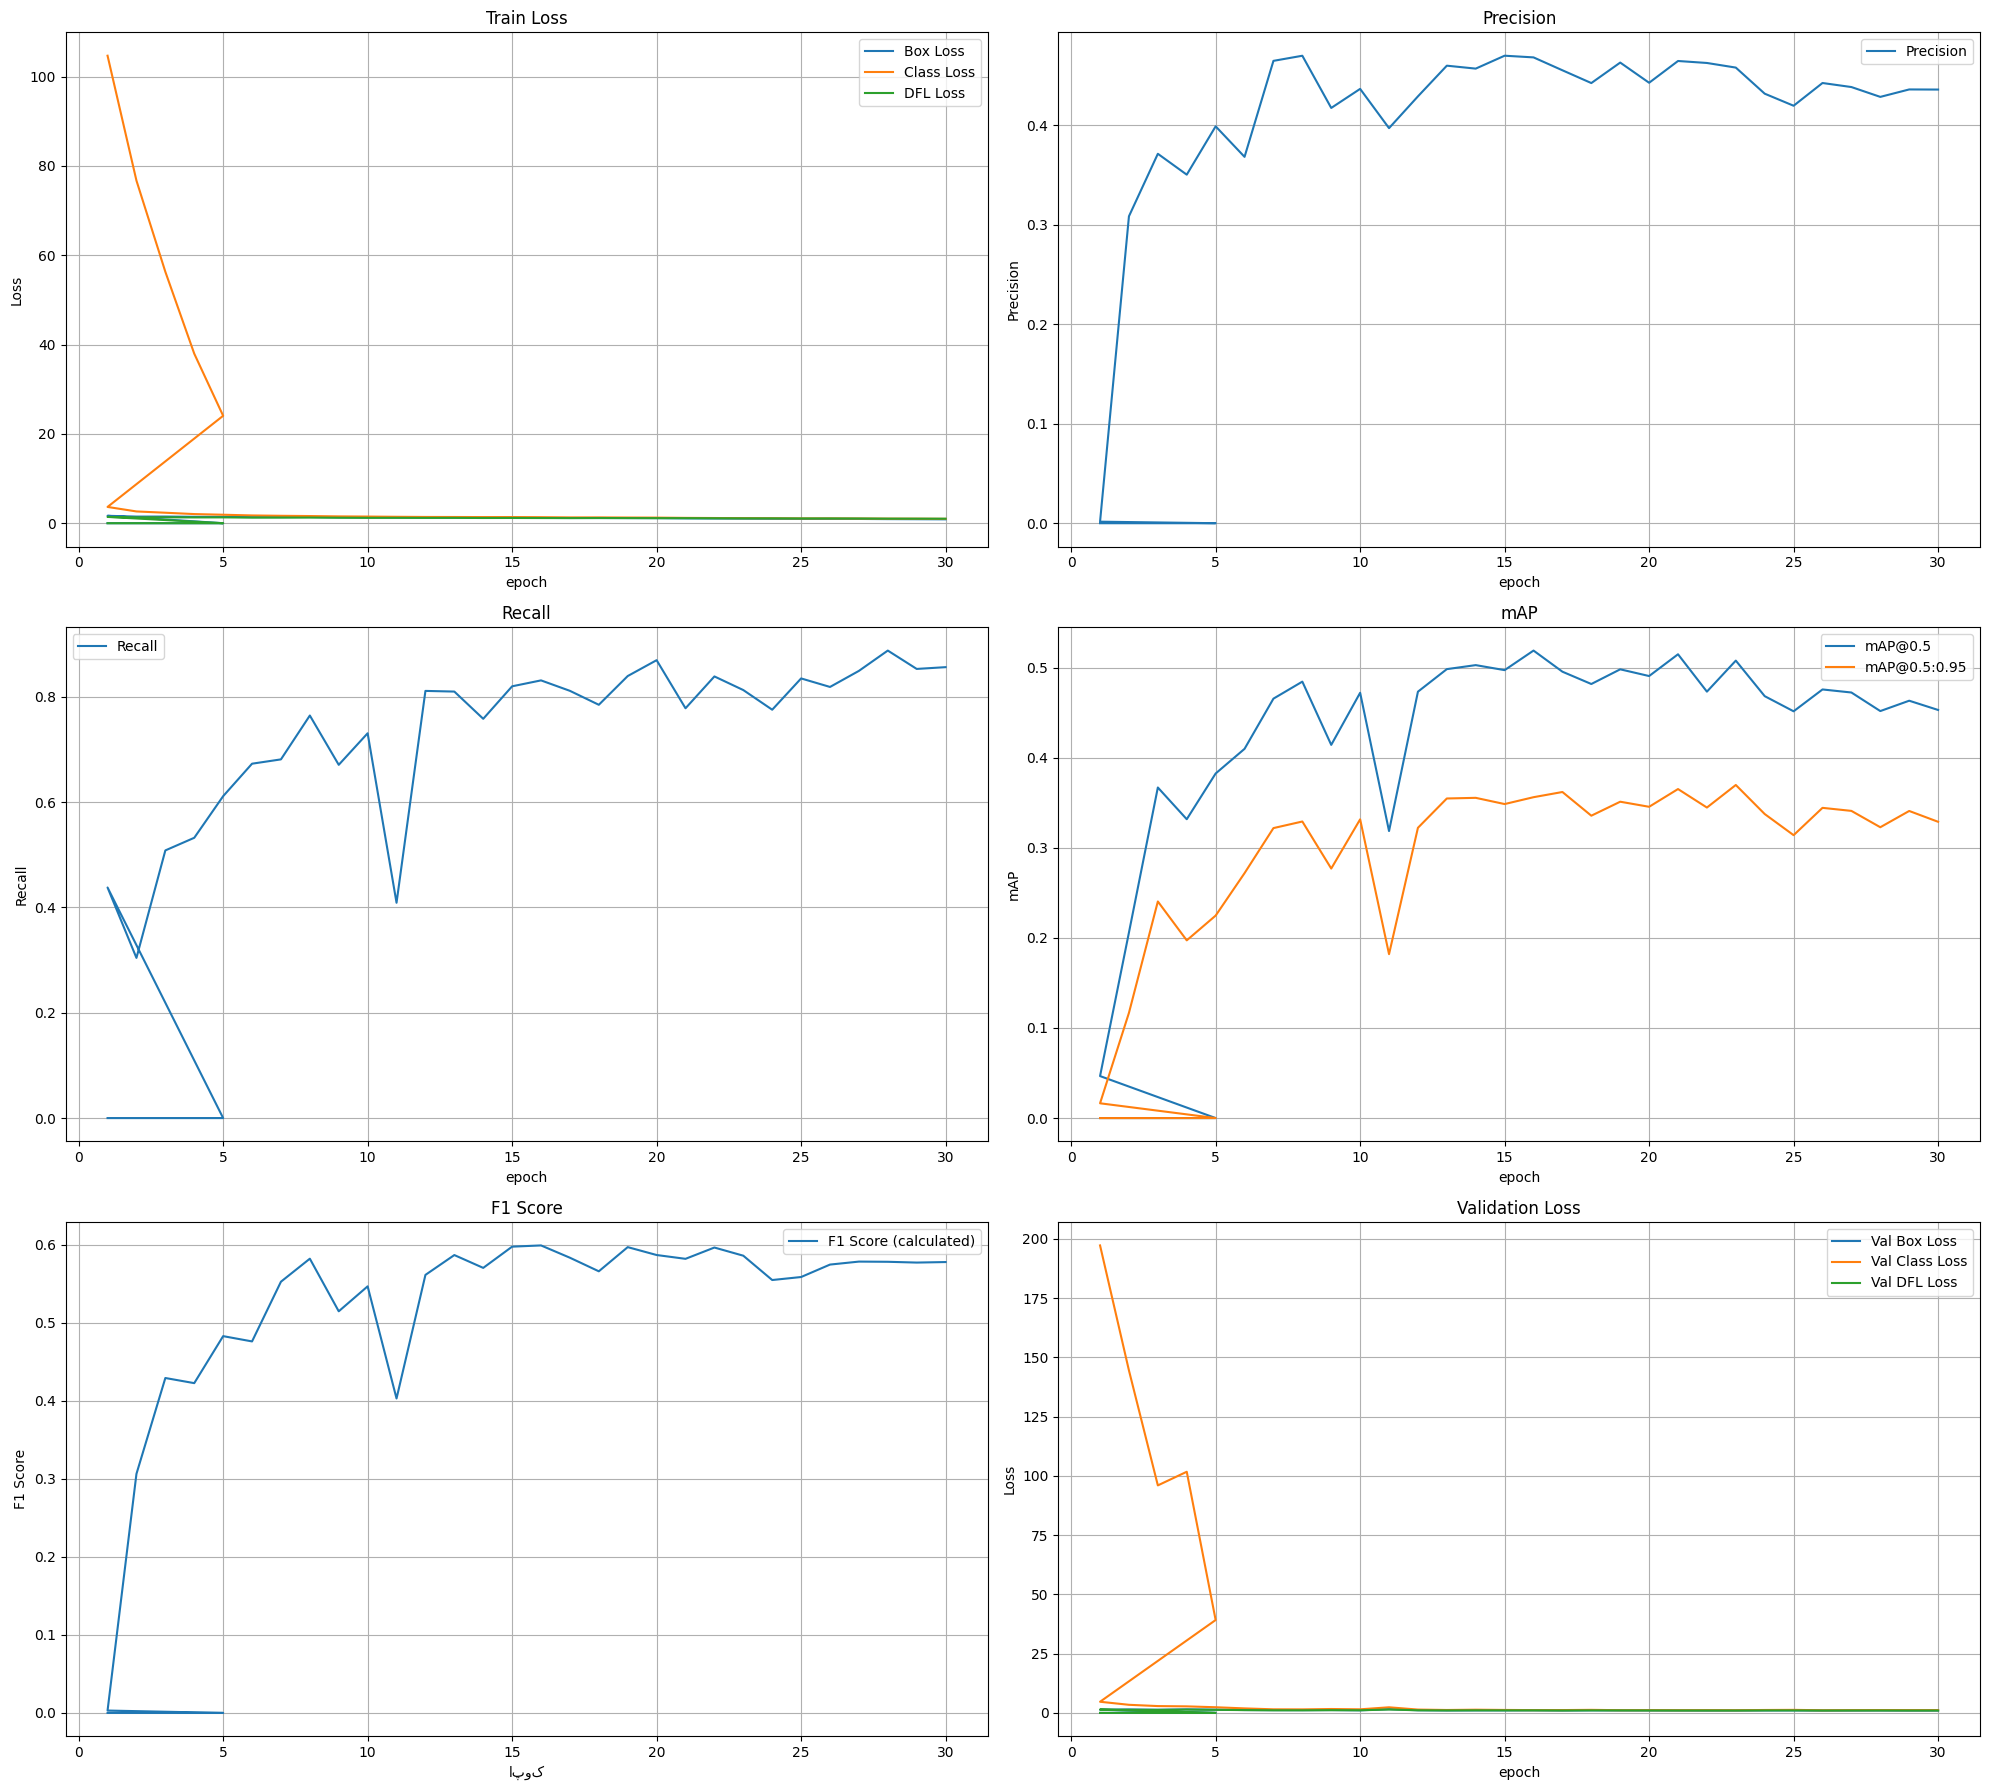

In [ ]:
import os
import pandas as pd
import matplotlib.pyplot as plt

folder = "/content/brain_tumor_finetune/yolov8_brain_tumor_preprocessed"
csv_path = os.path.join(folder, "results.csv")

df = pd.read_csv(csv_path)
print("نمایش چند سطر اول فایل results.csv:")
display(df.head())

epochs = df['epoch'] if 'epoch' in df.columns else range(1, len(df)+1)

plt.figure(figsize=(20,18))


plt.subplot(3,2,1)
plt.plot(epochs, df['train/box_loss'], label='Box Loss')
plt.plot(epochs, df['train/cls_loss'], label='Class Loss')
plt.plot(epochs, df['train/dfl_loss'], label='DFL Loss')
plt.title('Train Loss')
plt.xlabel('epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)


plt.subplot(3,2,2)
plt.plot(epochs, df['metrics/precision(B)'], label='Precision')
plt.title('Precision')
plt.xlabel('epoch')
plt.ylabel('Precision')
plt.legend()
plt.grid(True)


plt.subplot(3,2,3)
plt.plot(epochs, df['metrics/recall(B)'], label='Recall')
plt.title('Recall')
plt.xlabel('epoch')
plt.ylabel('Recall')
plt.legend()
plt.grid(True)


plt.subplot(3,2,4)
plt.plot(epochs, df['metrics/mAP50(B)'], label='mAP@0.5')
plt.plot(epochs, df['metrics/mAP50-95(B)'], label='mAP@0.5:0.95')
plt.title('mAP')
plt.xlabel('epoch')
plt.ylabel('mAP')
plt.legend()
plt.grid(True)


plt.subplot(3,2,5)
f1 = 2 * (df['metrics/precision(B)'] * df['metrics/recall(B)']) / (df['metrics/precision(B)'] + df['metrics/recall(B)'] + 1e-10)
plt.plot(epochs, f1, label='F1 Score (calculated)')
plt.title('F1 Score')
plt.xlabel('اپوک')
plt.ylabel('F1 Score')
plt.legend()
plt.grid(True)


plt.subplot(3,2,6)
plt.plot(epochs, df['val/box_loss'], label='Val Box Loss')
plt.plot(epochs, df['val/cls_loss'], label='Val Class Loss')
plt.plot(epochs, df['val/dfl_loss'], label='Val DFL Loss')
plt.title('Validation Loss')
plt.xlabel('epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()


## ارزیابی مدل و نمایش پیش‌بینی روی تصاویر نمونه

In [ ]:
from ultralytics import YOLO
from IPython.display import Markdown, display
import matplotlib.pyplot as plt
import pandas as pd


model_path = "brain_tumor_finetune/yolov8_brain_tumor_preprocessed/weights/best.pt"
model = YOLO(model_path)

yaml_new_path = "/content/brain-tumor-preprocessed/brain-tumor.yaml"


val_results = model.val(data=yaml_new_path, batch=16, imgsz=640)
display(Markdown("### نتایج ارزیابی مدل آماده است:"))

Ultralytics 8.3.141 🚀 Python-3.11.12 torch-2.6.0+cu124 CPU (Intel Xeon 2.20GHz)
Model summary (fused): 72 layers, 3,006,038 parameters, 0 gradients, 8.1 GFLOPs
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 804.3±212.2 MB/s, size: 23.0 KB)


val: Scanning /content/brain-tumor-preprocessed/valid/labels.cache... 223 images, 0 backgrounds, 0 corrupt: 100%|██████████| 223/223 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:20<00:00,  1.47s/it]


                   all        223        241      0.458      0.813      0.508       0.37
              negative        142        154      0.582      0.822      0.631      0.461
              positive         81         87      0.335      0.805      0.384      0.278
Speed: 2.4ms preprocess, 83.3ms inference, 0.0ms loss, 0.8ms postprocess per image
Results saved to runs/detect/val3


### نتایج ارزیابی مدل آماده است:

## نمایش نتایج به صورت جدول مرتب

In [ ]:
classes_names = list(val_results.names.values())
precisions = val_results.box.p
recalls = val_results.box.r

mean_map50 = val_results.box.map50
mean_map5095 = val_results.box.map
map50_list = [mean_map50] * len(classes_names)
map5095_list = [mean_map5095] * len(classes_names)

data = {
    "Class": classes_names,
    "Precision": [f"{p:.3f}" for p in precisions],
    "Recall": [f"{r:.3f}" for r in recalls],
    "mAP@0.5": [f"{m:.3f}" for m in map50_list],
    "mAP@0.5:0.95": [f"{m:.3f}" for m in map5095_list]
}

df_results = pd.DataFrame(data)
display(df_results)

,Class,Precision,Recall,mAP@0.5,mAP@0.5:0.95
0,negative,0.582,0.822,0.508,0.370
1,positive,0.335,0.805,0.508,0.370


## میانگین

In [ ]:
mean_precision = precisions.mean()
mean_recall = recalls.mean()


print(f"Precision mean: {mean_precision:.3f}")
print(f"Recall mean: {mean_recall:.3f}")
print(f"mAP@0.5 mean: {mean_map50:.3f}")
print(f"mAP@0.5:0.95 mean: {mean_map5095:.3f}")

Precision mean: 0.458
Recall mean: 0.813
mAP@0.5 mean: 0.508
mAP@0.5:0.95 mean: 0.370


## رسم نمودار برای هر کلاس

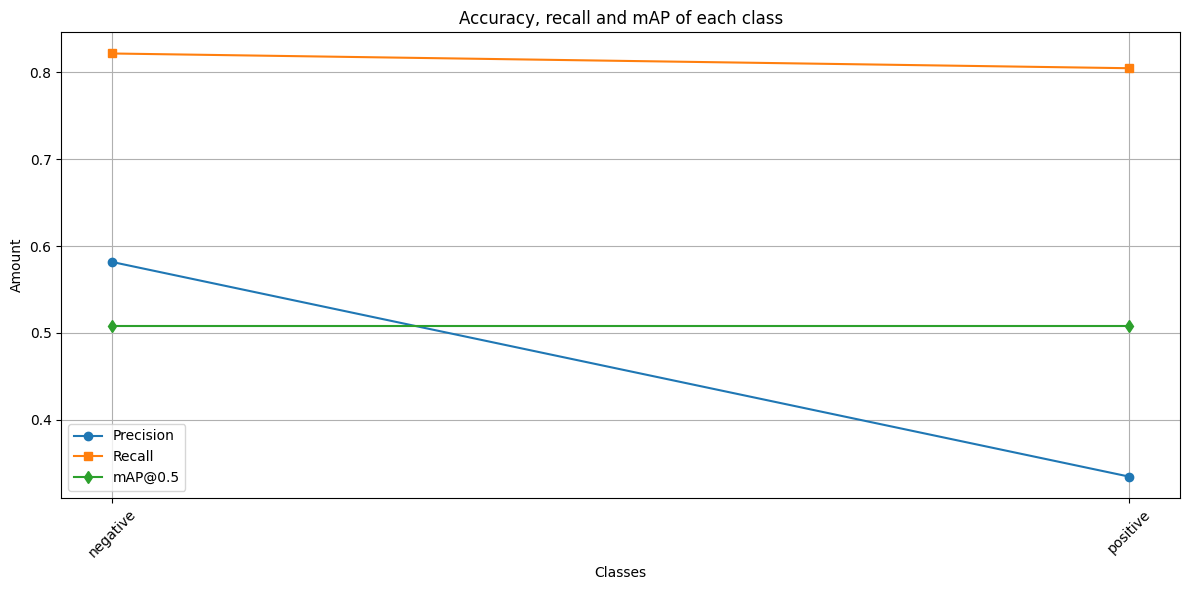

In [ ]:
plt.figure(figsize=(12,6))
x = range(len(classes_names))

plt.plot(x, precisions, 'o-', label="Precision")
plt.plot(x, recalls, 's-', label="Recall")
plt.plot(x, map50_list, 'd-', label="mAP@0.5")
plt.xticks(x, classes_names, rotation=45)
plt.title("Accuracy, recall and mAP of each class")
plt.xlabel("Classes")
plt.ylabel("Amount")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

##  نمایش نمونه پیش‌بینی روی چند تصویر اعتبارسنجی


image 1/1 /content/brain-tumor-preprocessed/valid/images/val_1 (155).jpg: 640x640 1 negative, 1 positive, 95.8ms
Speed: 2.4ms preprocess, 95.8ms inference, 11.0ms postprocess per image at shape (1, 3, 640, 640)


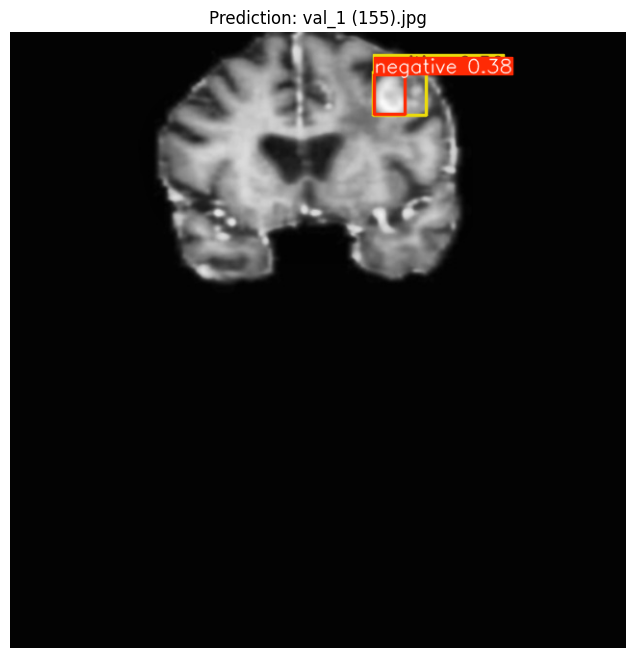


image 1/1 /content/brain-tumor-preprocessed/valid/images/val_1 (48).jpg: 640x640 1 negative, 1 positive, 76.3ms
Speed: 2.2ms preprocess, 76.3ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)


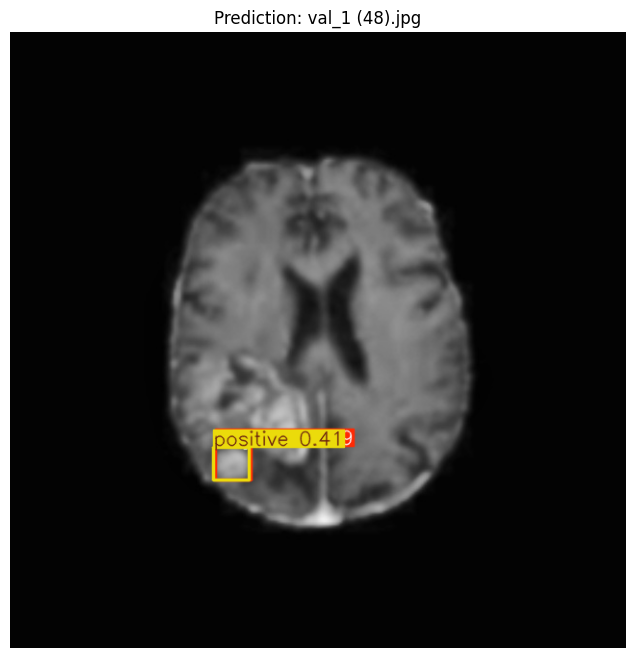


image 1/1 /content/brain-tumor-preprocessed/valid/images/val_1 (67).jpg: 640x640 (no detections), 71.3ms
Speed: 1.9ms preprocess, 71.3ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)


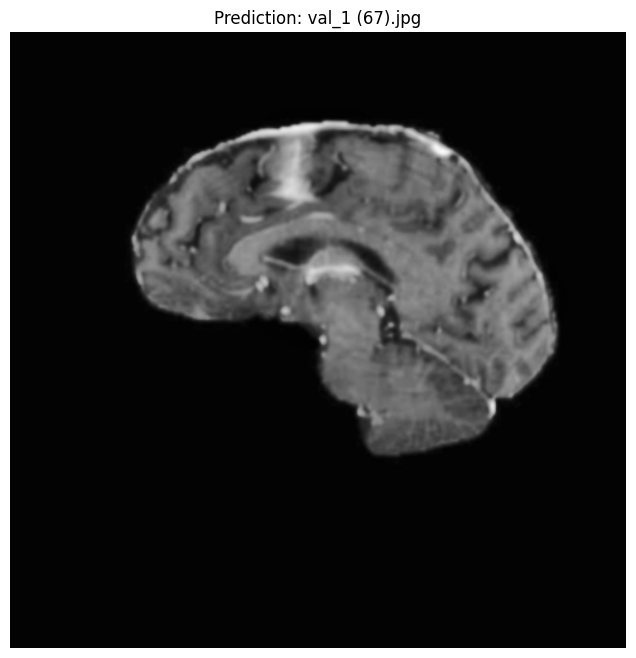


image 1/1 /content/brain-tumor-preprocessed/valid/images/val_1 (57).jpg: 640x640 2 negatives, 2 positives, 73.3ms
Speed: 2.1ms preprocess, 73.3ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)


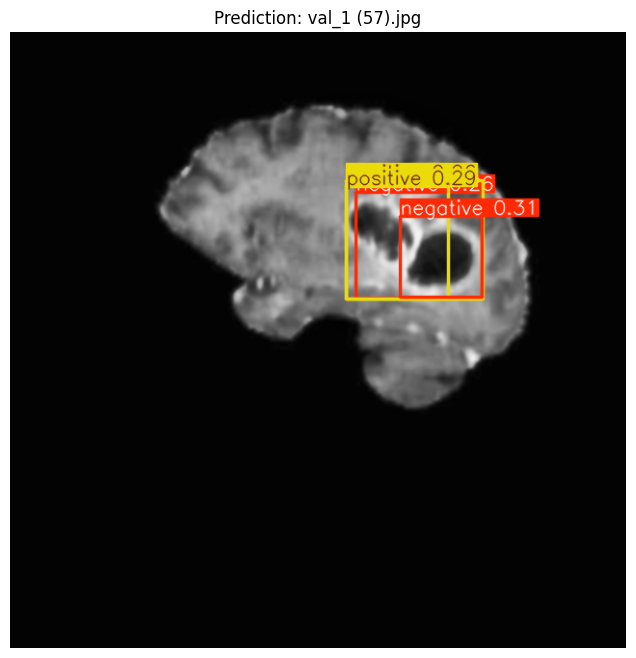


image 1/1 /content/brain-tumor-preprocessed/valid/images/val_1 (172).jpg: 640x640 1 negative, 1 positive, 76.0ms
Speed: 1.9ms preprocess, 76.0ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)


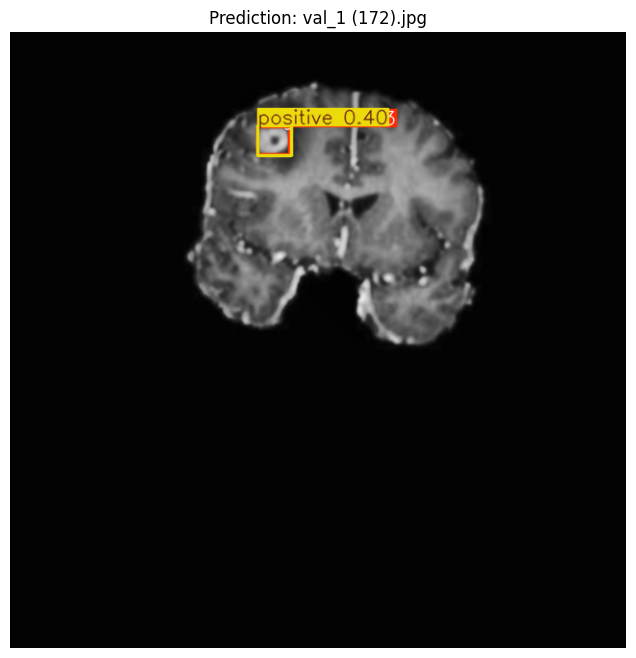

In [ ]:
import os
import matplotlib.pyplot as plt

val_img_dir = "/content/brain-tumor-preprocessed/valid/images"
val_images = os.listdir(val_img_dir)[:5]

for img_name in val_images:
    img_path = os.path.join(val_img_dir, img_name)
    preds = model.predict(source=img_path, imgsz=640, conf=0.25)
    annotated_img = preds[0].plot()
    plt.figure(figsize=(8,8))
    plt.imshow(annotated_img)
    plt.title(f"Prediction: {img_name}")
    plt.axis("off")
    plt.show()